IMPORTING LIBRARIES TO BE USED IN THE PROJECT

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

READING EXCEL FILE WITH THE HELP OF OPENPYXL

In [4]:
df = pd.read_excel('bank.xlsx', engine='openpyxl')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116201 entries, 0 to 116200
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Account No           116201 non-null  object        
 1   DATE                 116201 non-null  datetime64[ns]
 2   TRANSACTION DETAILS  113702 non-null  object        
 3   CHQ.NO.              905 non-null     float64       
 4   VALUE DATE           116201 non-null  datetime64[ns]
 5   WITHDRAWAL AMT       53549 non-null   float64       
 6   DEPOSIT AMT          62652 non-null   float64       
 7   BALANCE AMT          116201 non-null  float64       
 8   .                    116201 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(3)
memory usage: 8.0+ MB
None


In [5]:
df.head

<bound method NDFrame.head of            Account No       DATE               TRANSACTION DETAILS  CHQ.NO.  \
0       409000611074' 2017-06-29  TRF FROM  Indiaforensic SERVICES      NaN   
1       409000611074' 2017-07-05  TRF FROM  Indiaforensic SERVICES      NaN   
2       409000611074' 2017-07-18        FDRL/INTERNAL FUND TRANSFE      NaN   
3       409000611074' 2017-08-01   TRF FRM  Indiaforensic SERVICES      NaN   
4       409000611074' 2017-08-16        FDRL/INTERNAL FUND TRANSFE      NaN   
...               ...        ...                               ...      ...   
116196  409000362497' 2019-03-05  TRF TO 1196428  Indiaforensic SE      NaN   
116197  409000362497' 2019-03-05        FDRL/INTERNAL FUND TRANSFE      NaN   
116198  409000362497' 2019-03-05        FDRL/INTERNAL FUND TRANSFE      NaN   
116199  409000362497' 2019-03-05                 IMPS 05-03-20194C      NaN   
116200  409000362497' 2019-03-05         Sweep Trf To: 40900036427      NaN   

       VALUE DATE  WI

DATA PROCESSING

In [7]:
df.fillna({'WITHDRAWAL AMT':0},inplace=True)

In [8]:
print(df.describe())

                                DATE        CHQ.NO.  \
count                         116201     905.000000   
mean   2017-05-20 00:08:40.477448448  791614.503867   
min              2015-01-01 00:00:00       1.000000   
25%              2016-05-30 00:00:00  704231.000000   
50%              2017-06-05 00:00:00  873812.000000   
75%              2018-05-26 00:00:00  874167.000000   
max              2019-03-05 00:00:00  874525.000000   
std                              NaN  151205.932910   

                          VALUE DATE  WITHDRAWAL AMT   DEPOSIT AMT  \
count                         116201    1.162010e+05  6.265200e+04   
mean   2017-05-20 00:04:43.288439808    2.068757e+06  3.806586e+06   
min              2015-01-01 00:00:00    0.000000e+00  1.000000e-02   
25%              2016-05-30 00:00:00    0.000000e+00  9.900000e+04   
50%              2017-06-05 00:00:00    0.000000e+00  4.265000e+05   
75%              2018-05-26 00:00:00    2.682500e+04  4.746411e+06   
max           

In [9]:
print(df['TRANSACTION DETAILS'].value_counts())

TRANSACTION DETAILS
FDRL/INTERNAL FUND TRANSFE          8839
FDRL/NATIONAL ELECTRONIC F          6262
INTERNAL FUND TRANSFER IN           3262
TRF TO  Indiaforensic SERVICES I    3082
Unknown                             2499
                                    ... 
NEFT/000069178587/INDIAN               1
NEFT/000069178631/INDIAN               1
NEFT/000069179261/INDIAN               1
NEFT/000069179347/INDIAN               1
IMPS IW 09032017 3C                    1
Name: count, Length: 44807, dtype: int64


In [10]:
total_withdrawals = df['WITHDRAWAL AMT'].sum()
total_deposits = df['DEPOSIT AMT'].sum()

print(f"Total Withdrawals: {total_withdrawals}")
print(f"Total Deposits: {total_deposits}")

Total Withdrawals: 240391632284.76004
Total Deposits: 238490215323.50003


In [11]:
print(df['BALANCE AMT'].describe())

count    1.162010e+05
mean    -1.404852e+09
std      5.348202e+08
min     -2.045201e+09
25%     -1.690383e+09
50%     -1.661395e+09
75%     -1.236888e+09
max      8.500000e+06
Name: BALANCE AMT, dtype: float64


In [12]:
df['DATE'] = pd.to_datetime(df['DATE'])  
daily_summary = df.groupby('DATE').agg(
    total_withdrawals=('WITHDRAWAL AMT', 'sum'),
    total_deposits=('DEPOSIT AMT', 'sum'),
    avg_balance=('BALANCE AMT', 'mean')
)

print(daily_summary.head())

            total_withdrawals  total_deposits   avg_balance
DATE                                                       
2015-01-01               0.00       2004999.0 -1.236863e+09
2015-01-02         5500056.18       2465620.0 -1.481999e+09
2015-01-03         2200000.00       2948160.0 -1.588304e+09
2015-01-05         3231000.00       3909020.0 -9.769555e+08
2015-01-06         3880056.18       3650750.0 -1.588364e+09


DATA VISUALIZATION

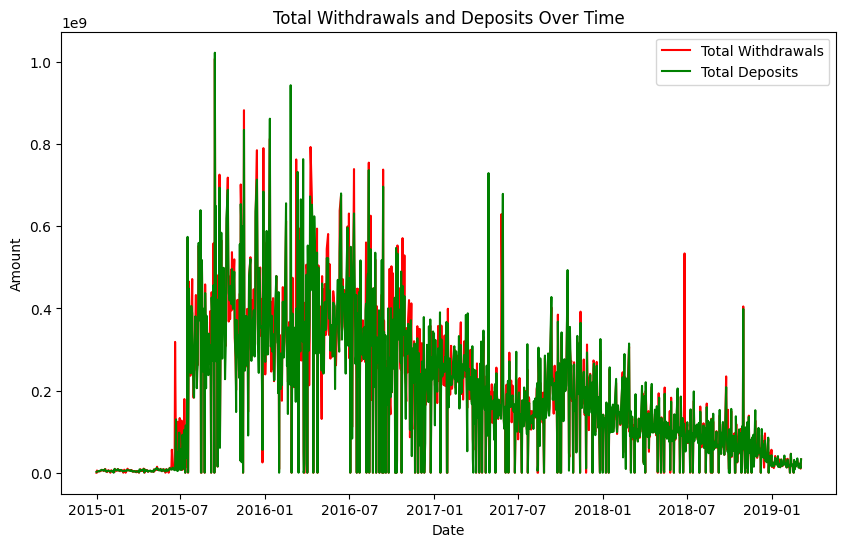

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(daily_summary.index, daily_summary['total_withdrawals'], label='Total Withdrawals', color='red')
plt.plot(daily_summary.index, daily_summary['total_deposits'], label='Total Deposits', color='green')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Total Withdrawals and Deposits Over Time')
plt.legend()
plt.show()


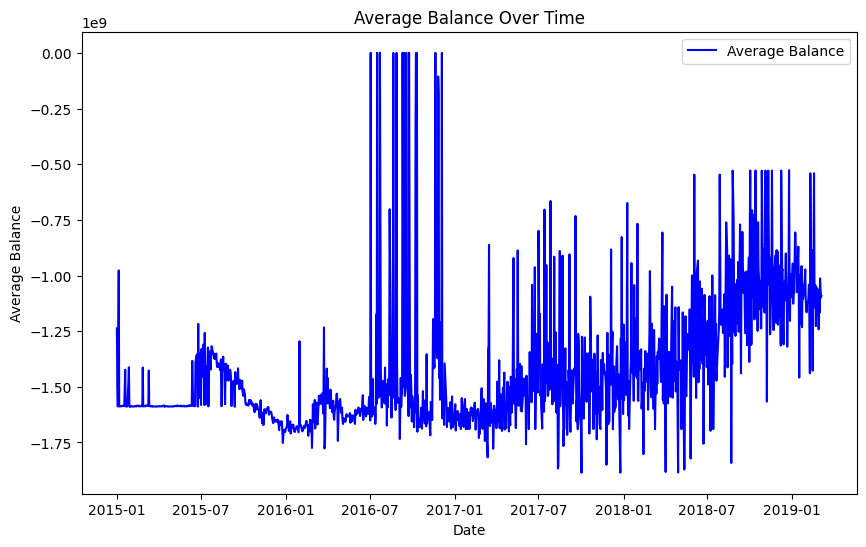

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(daily_summary.index, daily_summary['avg_balance'], label='Average Balance', color='blue')
plt.xlabel('Date')
plt.ylabel('Average Balance')
plt.title('Average Balance Over Time')
plt.legend()
plt.show()

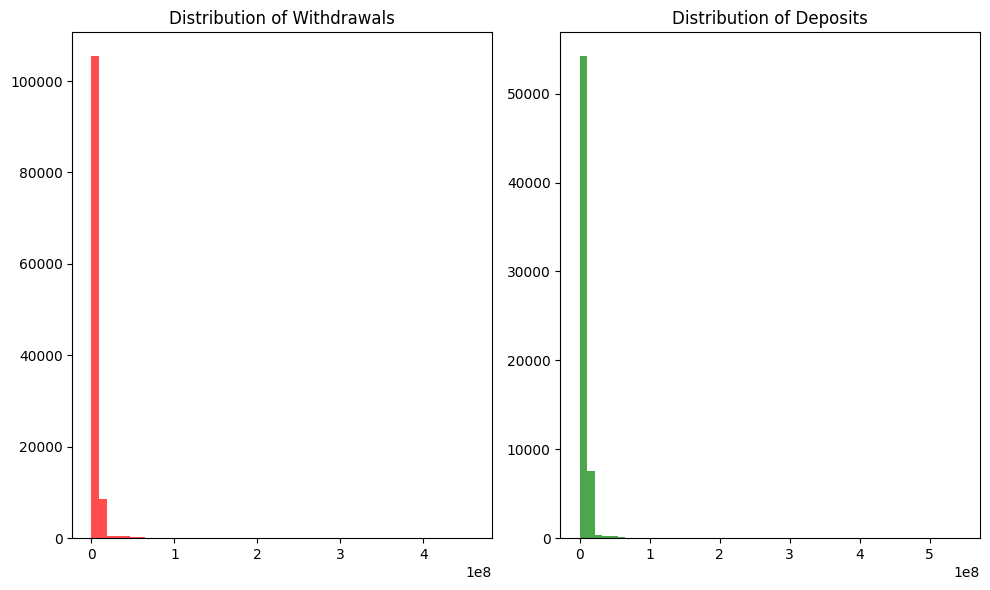

In [16]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(df['WITHDRAWAL AMT'].dropna(), bins=50, color='red', alpha=0.7)
plt.title('Distribution of Withdrawals')

plt.subplot(1, 2, 2)
plt.hist(df['DEPOSIT AMT'].dropna(), bins=50, color='green', alpha=0.7)
plt.title('Distribution of Deposits')

plt.tight_layout()
plt.show()


                WITHDRAWAL AMT  DEPOSIT AMT  BALANCE AMT
WITHDRAWAL AMT        1.000000          NaN    -0.072893
DEPOSIT AMT                NaN      1.00000    -0.055840
BALANCE AMT          -0.072893     -0.05584     1.000000


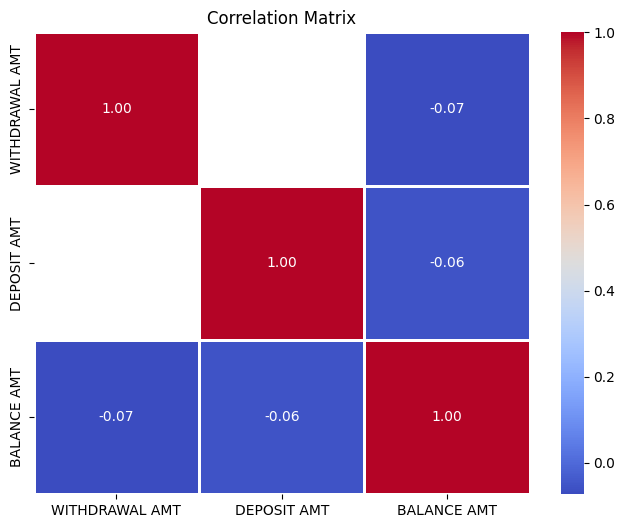

In [18]:
corr_matrix = df[['WITHDRAWAL AMT', 'DEPOSIT AMT', 'BALANCE AMT']].corr()
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Matrix')
plt.show()


In [20]:
df.to_excel('cleaned_bank_data.xlsx', index=False)

CODE TO DO DATA ANALYSIS ON SPECIFIC ACCOUNT NUMBER RECIEVED FROM USER


Account Analysis:
Total Withdrawals: INR 145397419.0
Total Deposits: INR 145859619.0
Final Balance: INR 462200.0
First Transaction Date: 2017-06-29 00:00:00
Last Transaction Date: 2019-02-08 00:00:00


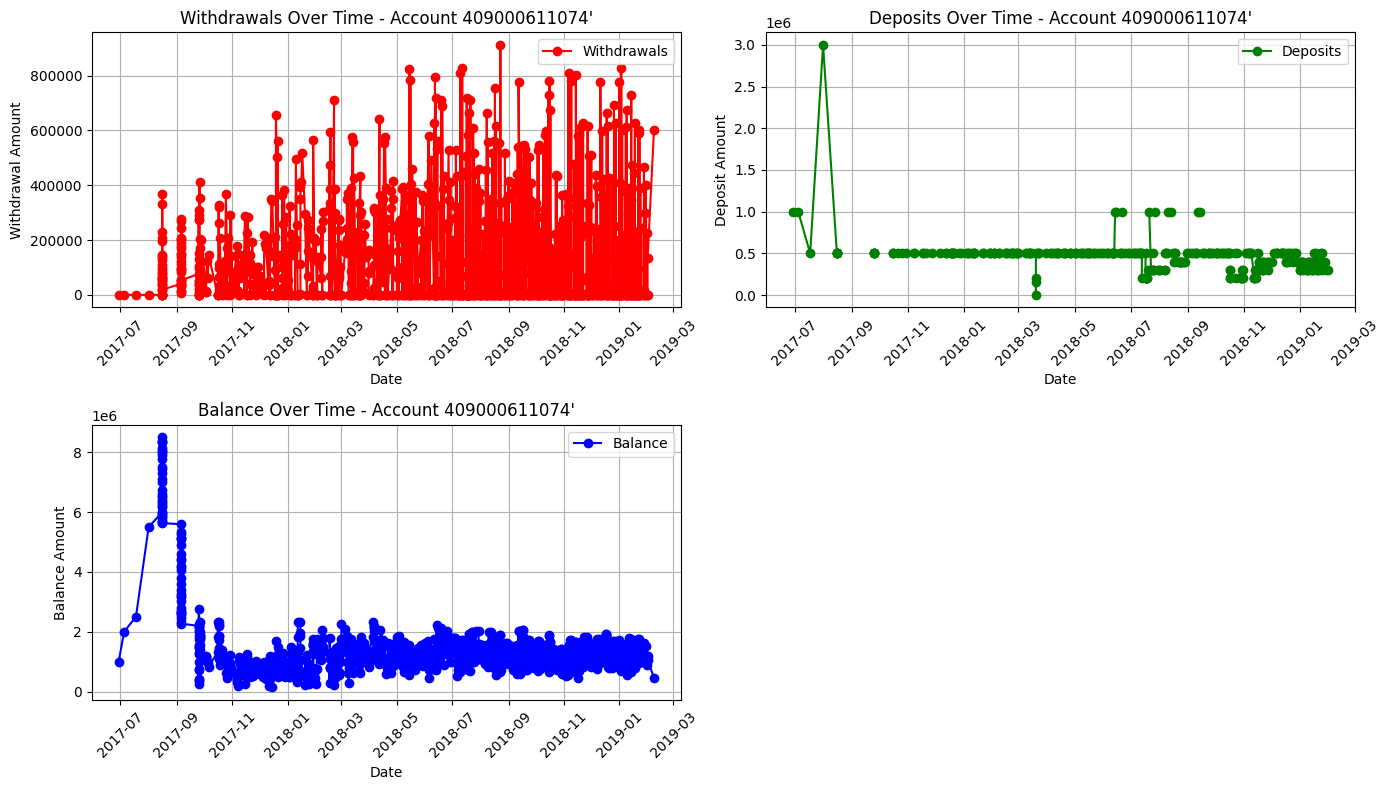

In [28]:
account_number = input("Enter the account number for analysis: ")
account_data = df[df['Account No'] == account_number]
if account_data.empty:
    print("Account number not found.")
else:
    total_withdrawals = account_data['WITHDRAWAL AMT'].sum() if not account_data['WITHDRAWAL AMT'].isnull().all() else 0
    total_deposits = account_data['DEPOSIT AMT'].sum() if not account_data['DEPOSIT AMT'].isnull().all() else 0
    final_balance = account_data['BALANCE AMT'].iloc[-1] 

    print("\nAccount Analysis:")
    print(f"Total Withdrawals: INR {total_withdrawals}")
    print(f"Total Deposits: INR {total_deposits}")
    print(f"Final Balance: INR {final_balance}")

    first_transaction_date = account_data['DATE'].min()
    last_transaction_date = account_data['DATE'].max()

    print(f"First Transaction Date: {first_transaction_date}")
    print(f"Last Transaction Date: {last_transaction_date}")

    plt.figure(figsize=(14, 8))
    plt.subplot(2, 2, 1)
    plt.plot(account_data['DATE'], account_data['WITHDRAWAL AMT'], marker='o', linestyle='-', color='red', label='Withdrawals')
    plt.title(f"Withdrawals Over Time - Account {account_number}")
    plt.xlabel('Date')
    plt.ylabel('Withdrawal Amount')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(account_data['DATE'], account_data['DEPOSIT AMT'], marker='o', linestyle='-', color='green', label='Deposits')
    plt.title(f"Deposits Over Time - Account {account_number}")
    plt.xlabel('Date')
    plt.ylabel('Deposit Amount')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(account_data['DATE'], account_data['BALANCE AMT'], marker='o', linestyle='-', color='blue', label='Balance')
    plt.title(f"Balance Over Time - Account {account_number}")
    plt.xlabel('Date')
    plt.ylabel('Balance Amount')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()
